<a href="https://colab.research.google.com/github/jwalasree/Data-Analysis/blob/main/laptop_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64


<ipython-input-20-e728a55275fd>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: forward fill
<ipython-input-20-e728a55275fd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")


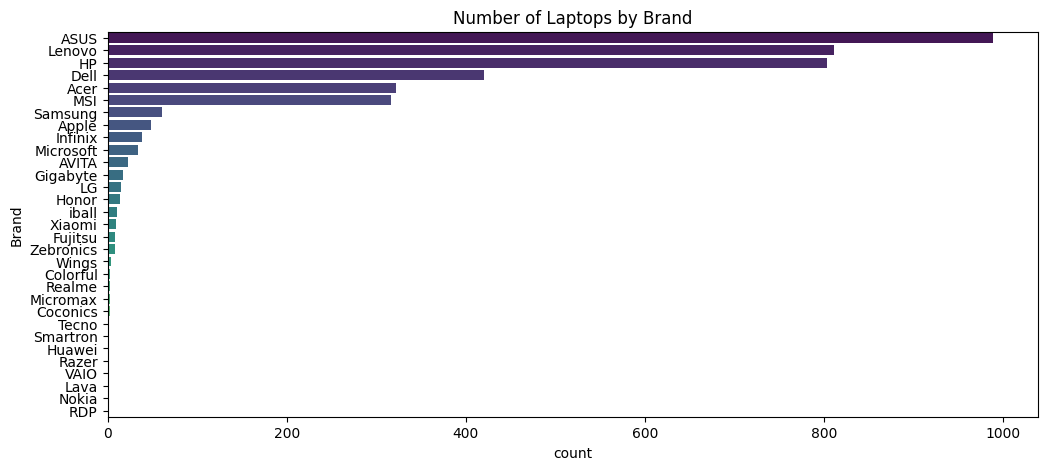

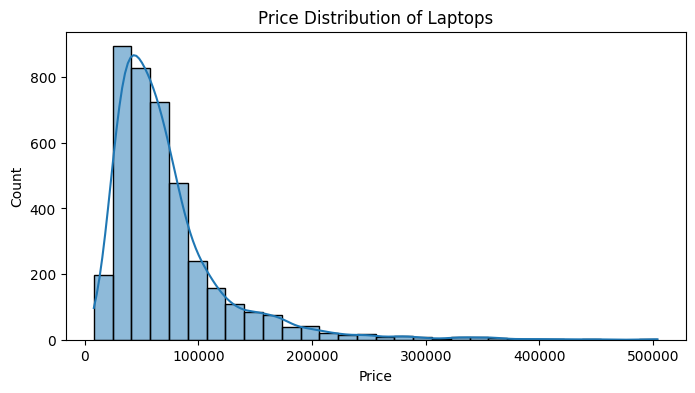

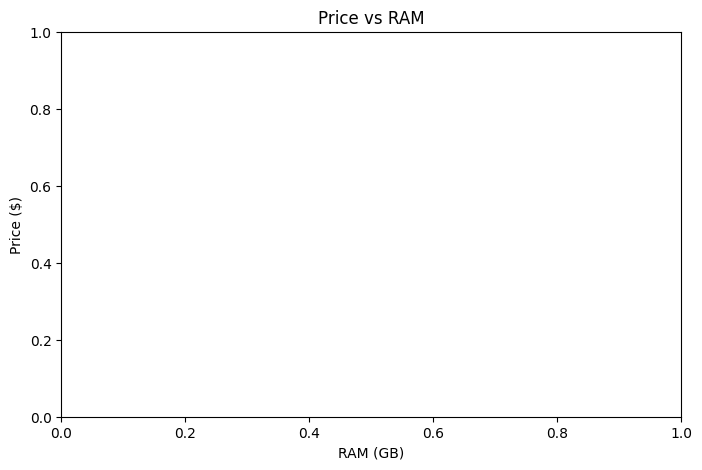

<ipython-input-20-e728a55275fd>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Processor_Brand"], palette="coolwarm")


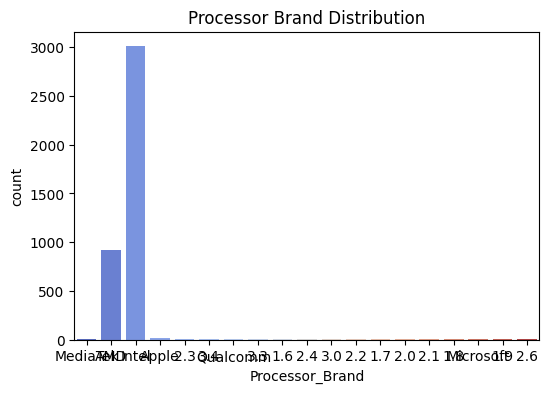

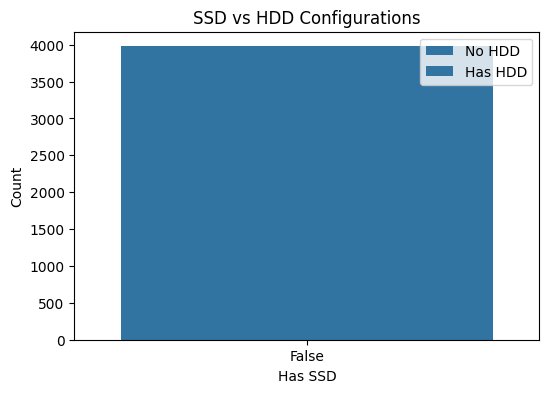

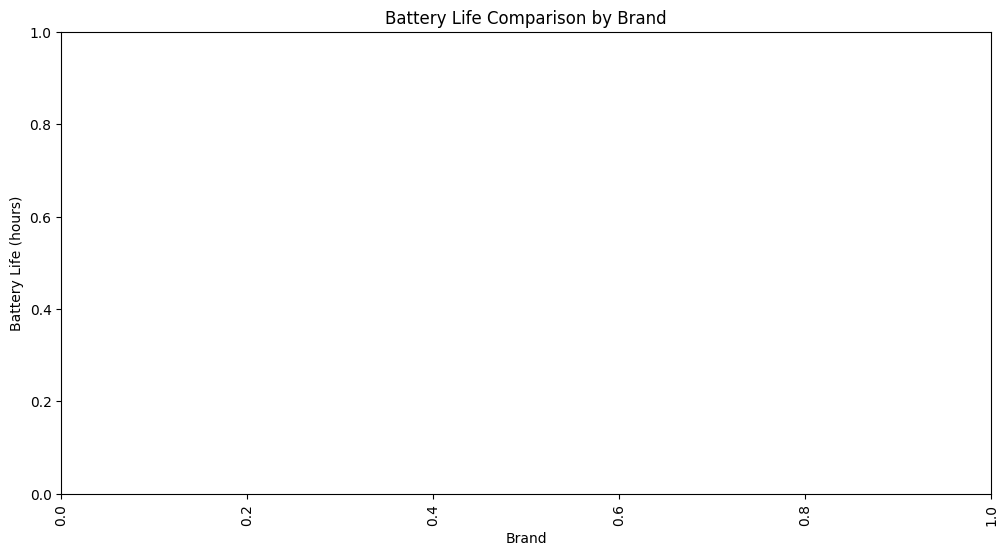

Average Price by Brand:
 Brand
RDP           10499.000000
Micromax      12662.666667
iball         12704.272727
Lava          14999.000000
Wings         32490.000000
Zebronics     36990.000000
AVITA         37975.043478
Smartron      41940.000000
Nokia         42917.000000
Tecno         42999.000000
Infinix       43691.461538
VAIO          45042.000000
Realme        46326.333333
Honor         47223.928571
Xiaomi        49589.900000
Coconics      55262.000000
Acer          57154.919255
Lenovo        63476.946979
HP            64447.186800
Dell          66729.595238
ASUS          77700.061678
Fujitsu       80590.000000
Colorful      83323.333333
LG            95742.733333
MSI          105940.806962
Samsung      109105.114754
Microsoft    119103.147059
Gigabyte     131412.529412
Apple        149040.306122
Huawei       149990.000000
Razer        358999.000000
Name: Price, dtype: float64
Empty DataFrame
Columns: [Brand, Name, Battery_Life, Price]
Index: []
Empty DataFrame
Columns: [Brand, N

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


path="/laptop.csv"
df=pd.read_csv(path)
df.head(3000)
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill, drop, or impute)
df.fillna(method='ffill', inplace=True)  # Example: forward fill

# Convert Price, RAM, SSD, HDD, and Battery_Life to numeric if necessary
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["RAM"] = pd.to_numeric(df["RAM"], errors='coerce')
df["SSD"] = pd.to_numeric(df["SSD"], errors='coerce')
df["HDD"] = pd.to_numeric(df["HDD"], errors='coerce')
df["Battery_Life"] = pd.to_numeric(df["Battery_Life"], errors='coerce')

# Verify data types
df.dtypes
# Summary statistics
df.describe()

# Count of laptops by Brand
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")
plt.title("Number of Laptops by Brand")
plt.show()

# Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution of Laptops")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
# Price vs RAM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["RAM"], y=df["Price"], hue=df["Processor_Brand"])
plt.title("Price vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.show()

# Most common processor brands
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Processor_Brand"], palette="coolwarm")
plt.title("Processor Brand Distribution")
plt.show()

# SSD vs HDD configurations
plt.figure(figsize=(6, 4))
sns.countplot(x=df["SSD"] > 0, hue=df["HDD"] > 0)
plt.title("SSD vs HDD Configurations")
plt.xlabel("Has SSD")
plt.ylabel("Count")
plt.legend(["No HDD", "Has HDD"])
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Remove missing values if any
df_clean = df.dropna(subset=["Battery_Life"])

# Ensure Battery_Life is numeric
df_clean["Battery_Life"] = pd.to_numeric(df_clean["Battery_Life"], errors="coerce")

# Plot Battery Life Comparison by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean["Brand"], y=df_clean["Battery_Life"], palette="Set2")

plt.xticks(rotation=90)  # Rotate brand names for readability
plt.xlabel("Brand")
plt.ylabel("Battery Life (hours)")
plt.title("Battery Life Comparison by Brand")

plt.show()
# Average price by brand
brand_price = df.groupby("Brand")["Price"].mean().sort_values()
print("Average Price by Brand:\n", brand_price)

# Best battery life in budget (<$1000)
best_battery = df[df["Price"] < 1000].sort_values("Battery_Life", ascending=False)
print(best_battery[["Brand", "Name", "Battery_Life", "Price"]].head(10))

# Filter: High-performance laptops (16GB RAM+, SSD, i7/Ryzen 7+)
high_perf = df[(df["RAM"] >= 16) & (df["SSD"] > 256) &
               (df["Processor_Name"].str.contains("i7|Ryzen 7", na=False))]
print(high_perf[["Brand", "Name", "Processor_Name", "RAM", "SSD", "Price"]])



